In [130]:
import pandas_datareader.data as web
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd
from pandas import Series
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

from keras.models import *
from keras.layers import * 
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import pywt
import os 
from sklearn.metrics import mean_squared_error

from statsmodels.robust import mad

In [3]:
os.getcwd()

'/home/peijin/Downloads'

In [4]:
#df = np.genfromtxt("data/household_power_consumption.txt", delimiter = ";", missing_values = "?", dtype = bytes).astype(str)
#len(df)

dat = pd.read_csv("data/household_power_consumption.txt", delimiter = ";", header = 0, na_values = "?")

In [5]:
dat.shape
dat_clean = dat.dropna(axis=0, how='any')
#arr = np.array(dat, dtype = float)
#arr2 = arr[:,2:]
#print(arr2)
#arr2[~np.isnan(arr2).any(axis=1)]


In [6]:
dat_clean.shape
print(dat_clean)
dat_array = np.array(dat_clean)

               Date      Time  Global_active_power  Global_reactive_power  \
0        16/12/2006  17:24:00                4.216                  0.418   
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
4        16/12/2006  17:28:00                3.666                  0.528   
5        16/12/2006  17:29:00                3.520                  0.522   
6        16/12/2006  17:30:00                3.702                  0.520   
7        16/12/2006  17:31:00                3.700                  0.520   
8        16/12/2006  17:32:00                3.668                  0.510   
9        16/12/2006  17:33:00                3.662                  0.510   
10       16/12/2006  17:34:00                4.448                  0.498   
11       16/12/2006  17:35:00                5.412                  0.470   

In [7]:
dat_array.shape


(2049280, 9)

In [8]:
dat_notime = dat_array[:,2:]

In [9]:
dat_notime.shape

(2049280, 7)

In [10]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_dat = scaler.fit_transform(dat_notime)


/home/peijin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
scaled_dat
pd.DataFrame(scaled_dat)

,0,1,2,3,4,5,6
0,-0.250407,-0.398561,-0.247819,-0.244813,-1.0,-0.975,0.096774
1,-0.043274,-0.372662,-0.326010,-0.053942,-1.0,-0.975,0.032258
2,-0.040739,-0.283453,-0.347981,-0.053942,-1.0,-0.950,0.096774
3,-0.038204,-0.277698,-0.318901,-0.053942,-1.0,-0.975,0.096774
4,-0.349991,-0.240288,-0.193538,-0.352697,-1.0,-0.975,0.096774
5,-0.376426,-0.248921,-0.236187,-0.385892,-1.0,-0.950,0.096774
6,-0.343473,-0.251799,-0.231664,-0.352697,-1.0,-0.975,0.096774
7,-0.343835,-0.251799,-0.223263,-0.352697,-1.0,-0.975,0.096774
8,-0.349629,-0.266187,-0.302746,-0.352697,-1.0,-0.975,0.096774
9,-0.350715,-0.266187,-0.311147,-0.352697,-1.0,-0.950,0.032258


In [12]:
train, test = train_test_split(scaled_dat, shuffle=False, test_size = 0.10)
valid, test = train_test_split(test, shuffle = False)
train.shape, valid.shape, test.shape

((1844352, 7), (153696, 7), (51232, 7))

In [13]:
trainX = train[:,1:]
trainY = train[:,0]
testX = test[:,1:]
testY = test[:,0]
validX = valid[:,1:]
validY = valid[:,0]

trainX = trainX.reshape(trainX.shape[0],1,trainX.shape[1])
validX = validX.reshape(validX.shape[0], 1, validX.shape[1])
testX = testX.reshape(testX.shape[0],1,testX.shape[1])
print(trainX.shape, validX.shape,testX.shape, trainY.shape)

(1844352, 1, 6) (153696, 1, 6) (51232, 1, 6) (1844352,)


In [ ]:
#this is if we wanted a lag or window of 2 meaning 2 timesteps 

dudeX = trainX.reshape(922176,2,6)
odds = []
for i in range(1844352):
    if i % 2 != 0:
        odds.append(i)
    else: evens.append(i)


dudeY = trainY[odds]
print(dudeY.shape, dudeX.shape)

#this is the new train set with a lag = 2, ie the last 2 time steps 

valid_odds = []
for i in range(len(validY)):
    if i % 2 != 0:
        valid_odds.append(i)

print(valid_odds)

# these are the new validation sets 
broX = validX.reshape(76848,2,6)
broY = validY[valid_odds] 

# these are the new testing sets
xs = testX.reshape(25616,2,6)

test_odds = []
for i in range(len(testY)):
    if i % 2 !=  0:
        test_odds.append(i)
        
ys = testY[test_odds]        

In [135]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [118]:
def splitter(data):
    train, test = train_test_split(data, shuffle=False, test_size = 0.10)
    valid, test = train_test_split(test, shuffle = False)
    trainX = train[:,1:]
    trainY = train[:,0]
    testX = test[:,1:]
    testY = test[:,0]
    validX = valid[:,1:]
    validY = valid[:,0]
    trainX = trainX.reshape(trainX.shape[0],1,trainX.shape[1])
    validX = validX.reshape(validX.shape[0], 1, validX.shape[1])
    testX = testX.reshape(testX.shape[0],1,testX.shape[1])
    return trainX, trainY, validX, validY, testX, testY

In [109]:
def single_lstm(neurons, optimizer, n_batch, n_epochs):
    model = Sequential()
    model.add(LSTM(neurons, return_sequences = False, batch_input_shape=(None, 1, trainX.shape[2]),
               activation = "tanh",
               recurrent_activation = "sigmoid",
               dropout = 0.2,
               recurrent_dropout = 0.2))
    model.add(Dense(1, activation = "relu"))   
    model.compile(loss="mean_squared_error", optimizer = optimizer) #sgd i s the best one so far 
    

    filepath = "power_consump_singleLSTM" + str(neurons) + ".hdf5"
    checkpointer = ModelCheckpoint(filepath,verbose = 2, save_best_only = True)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.002, patience=10, verbose=2, mode='auto')


    history = model.fit(trainX, trainY, 
                batch_size = n_batch, 
                epochs = n_epochs, 
                verbose = 2, 
                validation_data = (validX, validY), 
                shuffle=False,
                callbacks = [checkpointer, early_stopping])
    return model, history 

In [110]:
def double_lstm(neurons, optimizer, n_batch, n_epochs):
    model = Sequential()
    model.add(LSTM(neurons, return_sequences = True, batch_input_shape=(None, 1, trainX.shape[2]),
               activation = "tanh",
               recurrent_activation = "sigmoid",
               dropout = 0.2,
               recurrent_dropout = 0.2))
    model.add(LSTM(8, return_sequences = True,recurrent_dropout = 0.2, dropout = 0.2))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(8))
    model.add(Dropout(0.2))
    model.add(Dense(1))   
    model.compile(loss="mean_squared_error", optimizer = optimizer) #sgd i s the best one so far 
    

    filepath = "power_consump_doubleLSTM" + str(neurons) + ".hdf5"
    checkpointer = ModelCheckpoint(filepath,verbose = 2, save_best_only = True)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.002, patience=10, verbose=2, mode='auto')


    history = model.fit(trainX, trainY, 
                batch_size = n_batch, 
                epochs = n_epochs, 
                verbose = 2, 
                validation_data = (validX, validY), 
                shuffle=False,
                callbacks = [checkpointer, early_stopping])
    return model, history 

In [85]:
def recon(data, wavelet, level = 2):
    cA2, cD2, cD1 = pywt.wavedec(data, wavelet = wavelet, mode = "per", level = level)
    sigma = mad(cA2) 
    uthresh = sigma * np.sqrt(2*np.log(len(cA2)))
    cA2_t = pywt.threshold(cA2, value = uthresh, mode = "soft")
    coeffs = cA2_t, cD2, cD1 
    data_rec = pywt.waverec(coeffs, wavelet = wavelet)
    return data_rec 

In [93]:
# now loop over all teh cols in teh scaled dataset

In [137]:
def scaled_recon(data, wavelet, level = 2):
    scaled_recon = np.ndarray(shape = data.shape)
    for i in range(data.shape[1]): 
        scaled_recon[:,i] = recon(data[:,i], wavelet = wavelet, level = level)
    return scaled_recon 

In [98]:
scaled_recon

array([[-0.15725149, -0.06546763,  0.06235864, ..., -1.        ,
        -0.975     ,  0.01612903],
       [ 0.04988231, -0.03956835, -0.01583199, ..., -1.        ,
        -0.975     , -0.0483871 ],
       [ 0.05241716,  0.04964029, -0.03780291, ..., -1.        ,
        -0.95      ,  0.01612903],
       ...,
       [-0.27061733, -0.26164186,  0.00339257, ..., -1.        ,
        -1.        , -0.63214415],
       [-0.27134157, -0.26164186, -0.00436187, ..., -1.        ,
        -1.        , -0.63214415],
       [-0.27170369, -0.26164186, -0.01405493, ..., -1.        ,
        -1.        , -0.63214415]])

In [99]:
scaled_dat

array([[-0.25040739, -0.39856115, -0.24781906, ..., -1.        ,
        -0.975     ,  0.09677419],
       [-0.04327358, -0.37266187, -0.32600969, ..., -1.        ,
        -0.975     ,  0.03225806],
       [-0.04073873, -0.28345324, -0.34798061, ..., -1.        ,
        -0.95      ,  0.09677419],
       ...,
       [-0.8439254 , -1.        ,  0.07399031, ..., -1.        ,
        -1.        , -1.        ],
       [-0.84464965, -1.        ,  0.06623586, ..., -1.        ,
        -1.        , -1.        ],
       [-0.84501177, -1.        ,  0.05654281, ..., -1.        ,
        -1.        , -1.        ]])

In [100]:
#perform the experiment first using the wavelet reconstructed data frame 

trainX, trainY, validX, validY, testX, testY = splitter(scaled_recon)

((1844352, 7), (153696, 7), (51232, 7))

In [111]:
ms1, historys1 = single_lstm(neurons = 8, optimizer = adam, n_batch = 5000, n_epochs = 50)

Train on 1844352 samples, validate on 153696 samples
Epoch 1/50
 - 4s - loss: 0.0894 - val_loss: 0.1021

Epoch 00001: val_loss improved from inf to 0.10206, saving model to power_consump_singleLSTM8.hdf5
Epoch 2/50
 - 3s - loss: 0.0887 - val_loss: 0.1021

Epoch 00002: val_loss improved from 0.10206 to 0.10206, saving model to power_consump_singleLSTM8.hdf5
Epoch 3/50
 - 3s - loss: 0.0887 - val_loss: 0.1021

Epoch 00003: val_loss improved from 0.10206 to 0.10206, saving model to power_consump_singleLSTM8.hdf5
Epoch 4/50
 - 3s - loss: 0.0887 - val_loss: 0.1021

Epoch 00004: val_loss improved from 0.10206 to 0.10206, saving model to power_consump_singleLSTM8.hdf5
Epoch 5/50
 - 4s - loss: 0.0887 - val_loss: 0.1021

Epoch 00005: val_loss improved from 0.10206 to 0.10206, saving model to power_consump_singleLSTM8.hdf5
Epoch 6/50
 - 4s - loss: 0.0887 - val_loss: 0.1021

Epoch 00006: val_loss improved from 0.10206 to 0.10206, saving model to power_consump_singleLSTM8.hdf5
Epoch 7/50
 - 4s - lo

In [133]:
trainX, trainY, validX, validY, testX, testY = splitter(scaled_recon)

In [136]:
ms2, historys2 = double_lstm(neurons = 8, optimizer = adam, n_batch = 1000, n_epochs = 50)

Train on 1844352 samples, validate on 153696 samples
Epoch 1/50
 - 13s - loss: 0.0115 - val_loss: 0.0030

Epoch 00001: val_loss improved from inf to 0.00299, saving model to power_consump_doubleLSTM8.hdf5
Epoch 2/50
 - 12s - loss: 0.0063 - val_loss: 0.0021

Epoch 00002: val_loss improved from 0.00299 to 0.00210, saving model to power_consump_doubleLSTM8.hdf5
Epoch 3/50
 - 11s - loss: 0.0053 - val_loss: 0.0018

Epoch 00003: val_loss improved from 0.00210 to 0.00177, saving model to power_consump_doubleLSTM8.hdf5
Epoch 4/50
 - 11s - loss: 0.0048 - val_loss: 0.0016

Epoch 00004: val_loss improved from 0.00177 to 0.00161, saving model to power_consump_doubleLSTM8.hdf5
Epoch 5/50
 - 12s - loss: 0.0045 - val_loss: 0.0015

Epoch 00005: val_loss improved from 0.00161 to 0.00150, saving model to power_consump_doubleLSTM8.hdf5
Epoch 6/50
 - 11s - loss: 0.0042 - val_loss: 0.0014

Epoch 00006: val_loss improved from 0.00150 to 0.00144, saving model to power_consump_doubleLSTM8.hdf5
Epoch 7/50
 - 1

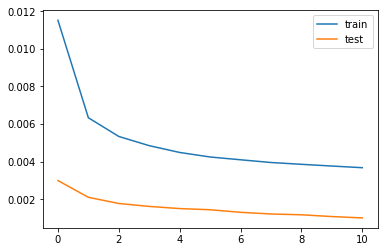

In [138]:
plt.plot(historys2.history["loss"], label = "train")
plt.plot(historys2.history["val_loss"], label = "test")
plt.legend()
plt.show()

plt.clf()
plt.cla()
plt.close()

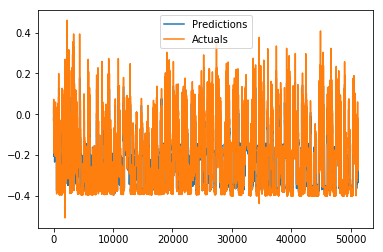

In [139]:
#Predictions on the actual test set 
testPredict = ms2.predict(testX, batch_size = 5000)

#now plot everything
plt.plot(testPredict, label = "Predictions")
plt.plot(testY, label = "Actuals")
plt.legend()
plt.show()


plt.clf()
plt.cla()
plt.close()


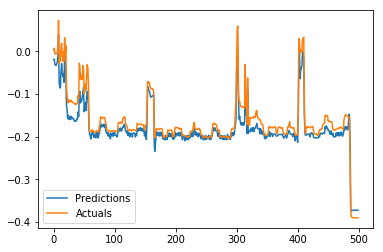

In [140]:
plt.plot(testPredict[0:500], label = "Predictions")
plt.plot(testY[0:500], label = "Actuals")
plt.legend()
plt.show()


plt.clf()
plt.cla()
plt.close()

In [141]:
#for the wavelet transformed/reconstructed data, the MSE:

mean_squared_error(testY, testPredict)

0.0013845871946471982

In [120]:
#for comparison do the experiment with original (scaled) data, no wavelets involved and use the double LSTM 
#since it seems better than the single LSTM 

trainX, trainY, validX, validY, testX, testY = splitter(scaled_dat)

In [121]:
m2, history2 = double_lstm(neurons = 8, optimizer = "adam", n_batch = 10000, n_epochs = 50)

Train on 1844352 samples, validate on 153696 samples
Epoch 1/50
 - 7s - loss: 0.1927 - val_loss: 0.0169

Epoch 00001: val_loss improved from inf to 0.01687, saving model to power_consump_doubleLSTM8.hdf5
Epoch 2/50
 - 5s - loss: 0.0532 - val_loss: 0.0135

Epoch 00002: val_loss improved from 0.01687 to 0.01347, saving model to power_consump_doubleLSTM8.hdf5
Epoch 3/50
 - 5s - loss: 0.0466 - val_loss: 0.0129

Epoch 00003: val_loss improved from 0.01347 to 0.01291, saving model to power_consump_doubleLSTM8.hdf5
Epoch 4/50
 - 6s - loss: 0.0433 - val_loss: 0.0129

Epoch 00004: val_loss improved from 0.01291 to 0.01287, saving model to power_consump_doubleLSTM8.hdf5
Epoch 5/50
 - 5s - loss: 0.0411 - val_loss: 0.0127

Epoch 00005: val_loss improved from 0.01287 to 0.01268, saving model to power_consump_doubleLSTM8.hdf5
Epoch 6/50
 - 5s - loss: 0.0392 - val_loss: 0.0125

Epoch 00006: val_loss improved from 0.01268 to 0.01245, saving model to power_consump_doubleLSTM8.hdf5
Epoch 7/50
 - 5s - lo

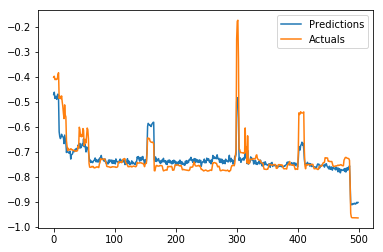

In [124]:
testPredict = m2.predict(testX, batch_size = 5000)

#now plot everything
plt.plot(testPredict[:500], label = "Predictions")
plt.plot(testY[:500], label = "Actuals")
plt.legend()
plt.show()


plt.clf()
plt.cla()
plt.close()

In [132]:
mean_squared_error(testY, testPredict)

0.006469456296073862

## It seems that the MSE for test predictions is much better for the wavelet-reconstructed 
## time series data than for the original data. In either case, best results come from using a double layer LSTM followed by 2 Dense layers.  